In [1]:
!pip install pandas scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 1.7 MB/s eta 0:00:0000:0100:01
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


## Wilcoxon signed-rank test

* <b>검정통계량</b>: 관측된 데이터가 귀무 가설을 얼마나 잘 지지하는지를 수치적으로 보여준다. 일반적으로 검정 통계량이 크면 귀무 가설에 반하는 증거가 강함을 의미하고, 검정 통계량이 작으면 데이터가 귀무 가설을 지지함을 나타낸다. 검정 통계량이 매우 작거나 0에 가까운 경우, 이는 모든 차이가 일관되게 같은 방향으로 나타난다는 것을 의미한다. <b>특히 0인 경우, 모든 차이가 정확히 같은 방향이라는 명확한 패턴을 나타내는 것이다.</b> 이러한 결과 역시 중요한 의미를 가질 수 있으며, 특정 조건이나 처리가 일관된 효과를 가진다는 것을 보여줄 수 있다.

* <b>유의확률(P-value)</b>: 귀무 가설이 참일 때 관측된 결과와 같거나 더 극단적인 결과가 우연히 발생할 확률이다. P-value가 작을수록 귀무 가설을 기각할 수 있는 근거가 강해진다. 일반적인 기준으로, P-value가 0.05(5%) 이하면 통계적으로 유의하다고 간주하여 귀무 가설을 기각하기 때문에 본 연구에서도 0.5를 기준으로 데이터를 분석한다. 0.5 이하라면 대립 가설을 수용하는 것이 일반적이다.

<br>
PPT 대비 EcoScript 프로그램이 발표 준비와 진행에 미치는 효과를 평가한다고 가정할 때 <br>
<b>귀무가설: "PPT를 사용할 때와 EcoScript 프로그램을 사용할 때 발표 준비와 진행에 있어서 만족도에 차이가 없다."</b>

<br>
<b>대립 가설: "PPT를 사용할 때와 EcoScript 프로그램을 사용할 때 발표 준비와 진행에 있어서 만족도에 유의미한 차이가 있다." </b><br>

우리가 연구를 통해 증명하고 싶은 바는 대립 가설이다.
다음 데이터 분석 결과, 귀무 가설을 기각할 만큼 충분한 증거가 있다면, 우리는 대립 가설을 지지할 수 있다.


In [1]:
import pandas as pd
from scipy.stats import wilcoxon

group_a = pd.read_excel('./PPT.xlsx',usecols=range(1, 6))
group_b = pd.read_excel('./EcoScript.xlsx',usecols=range(1, 6))

group_a

,"1. PPT 발표자 모드를 사용함으로써, 발표 시간 분배에 도움이 되었나요?","2. PPT 발표자 모드를 사용함으로써, 목소리의 음량, 속도, 높낮이 면에서 얼마나 더 신뢰감을 줬다고 생각하시나요?","3. PPT 발표자 모드를 사용함으로써, 한 슬라이드에 긴 대본이 할당 되었을 때 읽기가 더 편리했나요?","4. PPT 발표자 모드를 사용함으로써, 발표 중 대본의 어느 부분을 읽고 있는지 알기 쉬웠나요?",5. PPT 발표자 모드를 사용하신 후의 만족도를 평가해 주세요.
0,7,5,5,6,6
1,6,6,5,4,5
2,5,3,3,3,3
3,3,3,2,3,3
4,3,2,2,6,4
5,5,4,2,3,4
6,7,5,6,4,5
7,6,4,5,6,6
8,5,6,6,6,5
9,3,4,2,2,2


In [2]:
group_b

,"1. EcoScript 프로그램을 사용함으로써, 발표 시간 분배에 도움이 되었나요?","2. EcoScript 프로그램을 사용함으로써, 목소리의 음량, 속도, 높낮이 면에서 얼마나 더 신뢰감을 줬다고 생각하시나요?","3. EcoScript를 사용함으로써, 한 슬라이드에 긴 대본이 할당 되었을 때 읽기가 더 편리했나요?","4. EcoScript를 사용함으로써, 발표 중 대본의 어느 부분을 읽고 있는지 알기 쉬웠나요?",5. EcoScript를 사용하신 후의 만족도를 평가해 주세요.
0,6,6,7,6,7
1,7,7,7,6,7
2,5,5,5,4,5
3,3,6,6,4,6
4,7,7,6,7,7
5,5,4,6,5,6
6,6,7,7,7,6
7,6,5,7,7,7
8,7,6,6,7,6
9,6,6,7,7,6


In [3]:
group_a_timer = group_a.iloc[:, 0].tolist()
group_b_timer = group_b.iloc[:, 0].tolist()
print(len(group_a_timer),len(group_b_timer))

# Wilcoxon signed-rank test 수행
t_statistic, t_p_value = wilcoxon(group_a_timer, group_b_timer)

print("1. 해당 프로그램을 사용함으로써, 발표 시간 분배에 도움이 되었나요?")
print("검정 통계량:", t_statistic)
print("유의확률:", t_p_value,"\n")

20 20
1. 해당 프로그램을 사용함으로써, 발표 시간 분배에 도움이 되었나요?
검정 통계량: 8.0
유의확률: 0.004499665251840459 



/Users/yang-eunseo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [4]:
print("ppt:",group_a_timer)
print("eco:",group_b_timer)

ppt: [7, 6, 5, 3, 3, 5, 7, 6, 5, 3, 4, 3, 3, 4, 3, 1, 5, 4, 6, 6]
eco: [6, 7, 5, 3, 7, 5, 6, 6, 7, 6, 5, 3, 3, 6, 6, 2, 7, 6, 7, 7]


<b>1. 프로그램을 사용함으로써, 발표 시간 분배에 도움이 되었나요?</b>

* <b>검정 통계량(Statistic): 8.0 </b><br>
Wilcoxon signed-rank test에서 계산된 검정 통계량으로, 두 그룹 간의 순위 합의 차이를 나타낸다. 검정 통계량이 클수록 두 그룹 간의 차이가 크다는 것을 의미한다.

* <b>유의확률(p-value): 0.004499665251840459</b><br>
유의확률은 귀무가설이 참일 때, 현재의 검정 통계량 혹은 더 극단적인 결과를 얻을 확률을 나타낸다. 이 값이 유의수준(alpha = 0.05)보다 작으면 귀무가설을 기각하고, 두 그룹 간의 차이가 통계적으로 유의하다고 판단한다.

* 귀무 가설: "두 그룹 간에 차이가 없다"라는 가설 <br>
즉, "EcoScript 프로그램을 사용함으로써 발표 시간 분배에 변화가 없다."

이 귀무가설은 검정 결과가 유의수준보다 작을 경우(일반적으로 0.05), 즉 유의한 결과를 얻을 경우 기각되며, 대립가설이 채택된다. 대립가설은 귀무가설과 반대되며, 일반적으로 "효과가 있다" 혹은 "두 그룹 간에 차이가 있다"는 것을 나타낸다.

결과: <b>"EcoScript 프로그램을 사용함으로써 발표 시간 분배에 도움이 되었다."</b>

In [5]:
group_a_voice = group_a.iloc[:, 1].tolist()
group_b_voice = group_b.iloc[:, 1].tolist()
print(len(group_a_voice),len(group_b_voice))

# Wilcoxon signed-rank test 수행
v_statistic, v_p_value = wilcoxon(group_a_voice, group_b_voice)

print("2. 해당 프로그램을 사용함으로써, 목소리의 음량, 속도, 높낮이 면에서 얼마나 더 신뢰감을 줬다고 생각하시나요?")
print("검정 통계량:", v_statistic) 
print("유의확률:", v_p_value,"\n") ## 매우 작으므로 우연히 이러한 차이가 날 확률이 적다는 의미

20 20
2. 해당 프로그램을 사용함으로써, 목소리의 음량, 속도, 높낮이 면에서 얼마나 더 신뢰감을 줬다고 생각하시나요?
검정 통계량: 0.0
유의확률: 0.00018239203669452182 



In [6]:
import numpy as np
np.mean(group_a_voice)
print(np.median(group_a_voice))
print("ppt:",group_a_voice)

3.0
ppt: [5, 6, 3, 3, 2, 4, 5, 4, 6, 4, 3, 3, 2, 2, 2, 1, 1, 1, 3, 3]


In [7]:
np.mean(group_b_voice)
print(np.median(group_b_voice))
print("eco:",group_b_voice)

6.0
eco: [6, 7, 5, 6, 7, 4, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 6]


<b>2. 해당 프로그램을 사용함으로써, 목소리의 음량, 속도, 높낮이 면에서 얼마나 더 신뢰감을 줬다고 생각하시나요?</b>

* <b>검정 통계량(Statistic): 0.0 </b><br>
검정 통계량이 0.0이라는 것은 두 그룹 간의 차이가 거의 없다는 것을 의미한다.

* <b>유의확률(p-value): 0.00018239203669452182 </b><br>
이 값은 귀무가설이 참일 때, 현재의 검정 통계량 혹은 더 극단적인 결과를 얻을 확률을 나타낸다. 유의확률이 매우 작은 것은 두 그룹 간의 차이가 우연히 발생할 확률이 매우 낮다는 것을 의미한다.

* 귀무 가설: "두 그룹 간에 차이가 없다"라는 가설 <br>
즉, "EcoScript 프로그램을 사용했을 때의 비해 ppt를 사용했을 때와 음성 특징에 대한 안정감 차이가 없다."

따라서 유의확률이 매우 작은 값인 0.00018239203669452182로 유의수준 0.05보다 작기 때문에, 해당 프로그램을 사용함으로써 목소리의 음량, 속도, 높낮이 면에서 통계적으로 유의한 변화가 있었다고 결론짓을 수 있다. 이는 해당 프로그램을 사용함으로써 목소리의 품질이 더 향상되었다고 생각할 수 있다.

결과: <b>"EcoScript 프로그램을 사용함으로써 음성 수치 안정화에 도움이 된다."</b>

In [8]:
group_a_cuecard = group_a.iloc[:, 2].tolist()
group_b_cuecard = group_b.iloc[:, 2].tolist()
print(len(group_a_cuecard),len(group_b_cuecard))

# Wilcoxon signed-rank test 수행
c_statistic, c_p_value = wilcoxon(group_a_cuecard, group_b_cuecard)

print("3. 해당 프로그램을 사용함으로써, 한 슬라이드에 긴 대본이 할당 되었을 때 읽기가 더 편리했나요?")
print("검정 통계량:", c_statistic) 
print("유의확률:", c_p_value,"\n") ## 매우 작으므로 우연히 이러한 차이가 날 확률이 적다는 의미

20 20
3. 해당 프로그램을 사용함으로써, 한 슬라이드에 긴 대본이 할당 되었을 때 읽기가 더 편리했나요?
검정 통계량: 0.0
유의확률: 0.00011566472320608132 



In [9]:
print("ppt:",group_a_cuecard)
print("eco:",group_b_cuecard)

ppt: [5, 5, 3, 2, 2, 2, 6, 5, 6, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 4]
eco: [7, 7, 5, 6, 6, 6, 7, 7, 6, 7, 3, 6, 6, 6, 4, 7, 7, 5, 7, 7]


<b>3. 해당 프로그램을 사용함으로써, 한 슬라이드에 긴 대본이 할당 되었을 때 읽기가 더 편리했나요?</b>

* <b>검정 통계량(Statistic): 0.0 </b><br>
검정 통계량이 0.0이라는 것은 두 그룹 간의 차이가 거의 없다는 것을 의미한다.

* <b>유의확률(p-value): 0.00011566472320608132  </b><br>
이 값은 귀무가설이 참일 때, 현재의 검정 통계량 혹은 더 극단적인 결과를 얻을 확률을 나타낸다. 유의확률이 매우 작은 것은 두 그룹 간의 차이가 우연히 발생할 확률이 매우 낮다는 것을 의미한다.

* 귀무 가설: "두 그룹 간에 차이가 없다"라는 가설 <br>
즉, "EcoScript 프로그램의 큐카드가 ppt를 사용했을 때와 편리함에 있어 별 차이가 없다."

따라서 유의확률이 매우 작은 값인 0.00011566472320608132 로 유의수준 0.05보다 작기 때문에, 해당 프로그램을 사용함으로써 목소리의 음량, 속도, 높낮이 면에서 통계적으로 유의한 변화가 있었다고 결론짓을 수 있다. 이는 해당 프로그램을 사용함으로써 목소리의 품질이 더 향상되었다고 생각할 수 있다.

결과: <b>"EcoScript 프로그램을 사용함으로써 큐카드가 발표의 편리함에 도움이 된다."</b>

In [10]:
group_a_track = group_a.iloc[:, 3].tolist()
group_b_track = group_b.iloc[:, 3].tolist()
print(len(group_a_track),len(group_b_track))

# Wilcoxon signed-rank test 수행
tr_statistic, tr_p_value = wilcoxon(group_a_track, group_b_track)

print("4. 해당 프로그램를 사용함으로써, 발표 중 대본의 어느 부분을 읽고 있는지 알기 쉬웠나요?")
print("검정 통계량:", tr_statistic) 
print("유의확률:", tr_p_value,"\n") ## 매우 작으므로 우연히 이러한 차이가 날 확률이 적다는 의미

20 20
4. 해당 프로그램를 사용함으로써, 발표 중 대본의 어느 부분을 읽고 있는지 알기 쉬웠나요?
검정 통계량: 0.0
유의확률: 0.00018239203669452182 



In [11]:
print("ppt:",group_a_track)
print("eco:",group_b_track)

ppt: [6, 4, 3, 3, 6, 3, 4, 6, 6, 2, 2, 2, 5, 2, 2, 5, 3, 1, 3, 3]
eco: [6, 6, 4, 4, 7, 5, 7, 7, 7, 7, 6, 5, 5, 5, 7, 7, 6, 6, 7, 7]


<b>4. 해당 프로그램를 사용함으로써, 발표 중 대본의 어느 부분을 읽고 있는지 알기 쉬웠나요?</b>

* <b>검정 통계량(Statistic): 0.0 </b><br>
검정 통계량이 0.0이라는 것은 두 그룹 간의 차이가 거의 없다는 것을 의미한다.

* <b>유의확률(p-value): 0.00018239203669452182   </b><br>
이 값은 귀무가설이 참일 때, 현재의 검정 통계량 혹은 더 극단적인 결과를 얻을 확률을 나타낸다. 유의확률이 매우 작은 것은 두 그룹 간의 차이가 우연히 발생할 확률이 매우 낮다는 것을 의미한다.

* 귀무 가설: "두 그룹 간에 차이가 없다"라는 가설 <br>
즉, "EcoScript 프로그램의 대본 트래킹 기능이 ppt를 사용했을 때와 편리함에 있어 별 차이가 없다."

따라서 유의확률이 매우 작은 값인 0.00018239203669452182  로 유의수준 0.05보다 작기 때문에, 해당 프로그램을 사용함으로써 목소리의 음량, 속도, 높낮이 면에서 통계적으로 유의한 변화가 있었다고 결론짓을 수 있다. 이는 해당 프로그램을 사용함으로써 목소리의 품질이 더 향상되었다고 생각할 수 있다.

결과: <b>"EcoScript 프로그램의 대본 트래킹 기능이 발표의 편리함에 도움이 된다."</b>

In [12]:
group_a_satisfaction = group_a.iloc[:, 4].tolist()
group_b_satisfaction = group_b.iloc[:, 4].tolist()
print(len(group_a_satisfaction),len(group_b_satisfaction))

# Wilcoxon signed-rank test 수행
s_statistic, s_p_value = wilcoxon(group_a_satisfaction, group_b_satisfaction)

print("5. 해당 프로그램을 사용하신 후의 만족도를 평가해 주세요.")
print("검정 통계량:", s_statistic) 
print("유의확률:", s_p_value,"\n") ## 매우 작으므로 우연히 이러한 차이가 날 확률이 적다는 의미

20 20
5. 해당 프로그램을 사용하신 후의 만족도를 평가해 주세요.
검정 통계량: 0.0
유의확률: 1.9073486328125e-06 



In [13]:
print("ppt:",group_a_satisfaction)
print("eco:",group_b_satisfaction)

ppt: [6, 5, 3, 3, 4, 4, 5, 6, 5, 2, 3, 3, 2, 4, 3, 2, 3, 3, 4, 4]
eco: [7, 7, 5, 6, 7, 6, 6, 7, 6, 6, 6, 5, 5, 6, 6, 6, 7, 6, 7, 7]


<b>5. 해당 프로그램을 사용하신 후의 만족도를 평가해 주세요.</b>

* <b>검정 통계량(Statistic): 0.0 </b><br>
검정 통계량이 0이라는 것은 조사 대상의 모든 참가자가 프로그램 사용 전후의 만족도 차이에서 일관된 패턴을 보였다는 것을 의미한다. 모든 차이가 같은 방향으로 나타났다는 것이며, 이는 모든 참가자가 프로그램 사용으로 인해 만족도가 증가했거나, 반대로 모두가 만족도가 감소했다는 것을 의미한다. 실제로는 만족도가 증가했을 가능성이 높은데, 그 이유는 유의확률과 함께 고려할 때 이러한 결과가 우연히 발생할 확률이 매우 낮기 때문이다.

* <b>유의확률(p-value): 1.907×10−6  </b><br>
유의확률(P-value)이 매우 낮다는 것은 귀무 가설(프로그램 사용 전후의 만족도에 차이가 없다는 가설)이 매우 낮은 확률로 참일 가능성이 있음을 나타낸다. 즉, 우리는 귀무 가설을 기각하고, <b>대립 가설(프로그램 사용 전후의 만족도에 유의미한 차이가 있다)을 지지할 충분한 근거가 있는 것이다.</b>

* 귀무 가설: "두 그룹 간에 차이가 없다"라는 가설 <br>
즉, "EcoScript 프로그램의 만족도가 ppt를 사용했을 때의 만족도와 별 차이가 없다."

따라서 유의확률이 매우 작은 값인 0.00018239203669452182  로 유의수준 0.05보다 작기 때문에, 해당 프로그램을 사용함으로써 목소리의 음량, 속도, 높낮이 면에서 통계적으로 유의한 변화가 있었다고 결론짓을 수 있다. 이는 해당 프로그램을 사용함으로써 목소리의 품질이 더 향상되었다고 생각할 수 있다.

결과: <b>"EcoScript 프로그램의 전체적인 만족도가 PPT보다 높다."</b>

In [14]:
import pandas as pd

data = {
    "Category": ["Timer", "Voice", "CueCard", "Tracking", "Satisfaction"],
    "Statistic": [8.0, 0.0, 0.0, 0.0, 0.0],
    "P-Value": [0.004499665251840459, 0.00018239203669452182, 0.00011566472320608132, 0.00018239203669452182, 1.9073486328125e-06]
}

df = pd.DataFrame(data)

print(df)

       Category  Statistic   P-Value
0         Timer        8.0  0.004500
1         Voice        0.0  0.000182
2       CueCard        0.0  0.000116
3      Tracking        0.0  0.000182
4  Satisfaction        0.0  0.000002


## 추가 시각화 작업

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

group_a = pd.read_excel('./PPT.xlsx', usecols=range(1, 6))
group_b = pd.read_excel('./EcoScript.xlsx', usecols=range(1, 6))

data_frames = []
questions = ['Timer', 'Voice', 'QueCard', 'Tracking', 'Total Satisfaction'] 

for i, question in enumerate(questions, start=1):
    df_temp = pd.DataFrame({
        'Score': pd.concat([group_a.iloc[:, i-1], group_b.iloc[:, i-1]], ignore_index=True),
        'Group': ['PPT']*len(group_a) + ['EcoScript']*len(group_b),
        'Question': question
    })
    data_frames.append(df_temp)

data_long_format = pd.concat(data_frames)ㄹ

stats_summary = data_long_format.groupby(['Question', 'Group']).Score.agg(['mean', 'median', 'std']).unstack()
stats_summary.columns = stats_summary.columns.map('_'.join)
stats_summary.reset_index(inplace=True)
stats_summary


,Question,mean_EcoScript,mean_PPT,median_EcoScript,median_PPT,std_EcoScript,std_PPT
0,QueCard,6.10,3.05,6.0,2.0,1.119210,1.538112
1,Timer,5.50,4.45,6.0,4.5,1.572795,1.605091
2,Total Satisfaction,6.20,3.70,6.0,3.5,0.695852,1.218282
3,Tracking,6.05,3.55,6.0,3.0,1.050063,1.605091
4,Voice,5.75,3.15,6.0,3.0,0.850696,1.531253


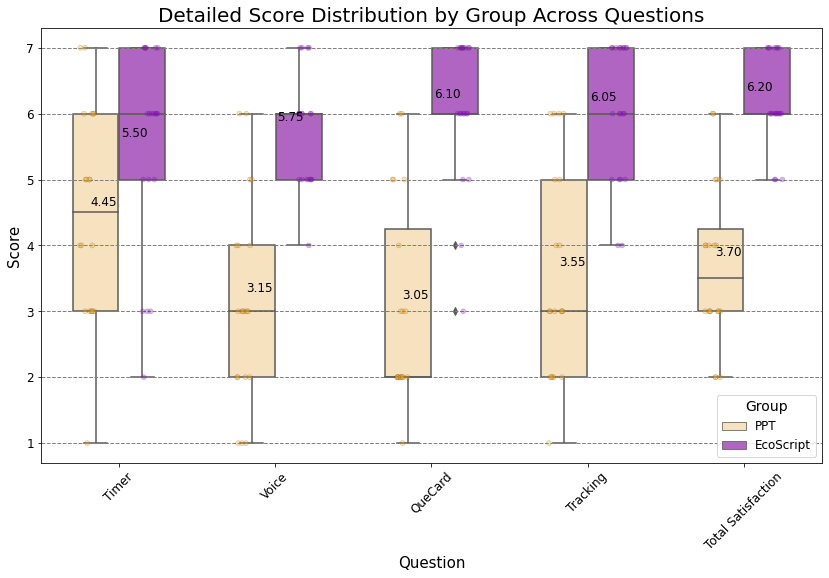

In [16]:
plt.figure(figsize=(14, 8))

boxplot = sns.boxplot(
    x='Question', 
    y='Score', 
    hue='Group', 
    data=data_long_format, 
    palette={'PPT': 'moccasin', 'EcoScript': 'mediumorchid'}, 
    width=0.6
)
stripplot = sns.stripplot(
    x='Question', 
    y='Score', 
    hue='Group', 
    data=data_long_format, 
    palette={'PPT': 'orange', 'EcoScript': 'darkviolet'}, 
    dodge=True, 
    jitter=True, 
    alpha=0.3, 
    linewidth=0.5
)

question_positions = np.arange(len(questions)) 

for y in range(1, 8):
    plt.axhline(y=y, color='grey', linestyle='--', linewidth=1)

for i, question in enumerate(questions):
    for j, group in enumerate(['PPT', 'EcoScript']):
        mean_score = data_long_format[(data_long_format['Question'] == question) & (data_long_format['Group'] == group)]['Score'].mean()
        plt.text(
            question_positions[i] + (j*0.2 - 0.1), 
            mean_score + 0.1, 
            f'{mean_score:.2f}', 
            color='black', 
            ha='center', 
            va='bottom', 
            fontsize=12 
        )

plt.title('Detailed Score Distribution by Group Across Questions', fontsize=20)
plt.xlabel('Question', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles=handles[:2], title='Group', fontsize=12, title_fontsize=14)  
plt.show()
